In [1]:
import os
os.chdir("C:/Users/ypuro/Swing Strategy Project/swing_strategy_project/notebooks")


In [2]:
import sys
sys.path.append("..")


In [3]:
#CELL 1: Import All Dependencies
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from strategy.swing_logic import SwingStrategy
from utils.data_loader import fetch_daily_data, fetch_benchmark_data
from backtest.backtest_engine import backtest


In [4]:
#CELL 2: Load Stock + Benchmark Data
symbol = "TATAMOTORS"
start_date = "2021-01-01"
end_date = "2023-12-31"

print(f"Fetching data for {symbol}")
stock_df = fetch_daily_data(symbol, start_date, end_date)
print(stock_df.columns)
benchmark_df = fetch_benchmark_data(start_date, end_date)


# Optional Preview
stock_df.tail()


Fetching data for TATAMOTORS
YF.download() has changed argument auto_adjust default to True
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object', name='Price')


Price,Open,High,Low,Close,Volume
Date,,,,,
2023-12-22,710.689597,724.768561,705.930527,718.522278,12062238
2023-12-26,721.199256,721.298380,710.491273,713.416138,7229143
2023-12-27,721.794110,735.526021,718.968430,734.584167,15052800
2023-12-28,736.319290,751.488852,732.749941,747.473389,14906199
2023-12-29,748.563946,796.055643,747.572470,773.301270,41170191


In [5]:
#CELL 3: Generate Trading Signals
strategy = SwingStrategy(stock_df, benchmark_df)
signals = strategy.generate_signals()
signals.head()


RS55 NaNs: 55
RSI NaNs: 13
Swing High NaNs: 19
ATR NaNs: 13

Sample Indicator Data:
 Price            Close      RS55        RSI  Swing_High        ATR
Date                                                              
2023-12-15  726.156677  0.093194  79.291458  727.743014  13.855877
2023-12-18  724.570251  0.089897  71.346142  728.486592  12.503222
2023-12-19  722.736023  0.087360  62.769230  728.486592  11.550693
2023-12-20  699.238098  0.065114  49.305136  728.486592  12.237644
2023-12-21  702.807373  0.042475  51.990606  728.486592  12.779417
2023-12-22  718.522278  0.074794  59.446095  728.486592  13.484072
2023-12-26  713.416138  0.069498  55.150600  728.486592  13.554892
2023-12-27  734.584167  0.087871  58.329563  735.526021  14.011681
2023-12-28  747.473389  0.103048  62.961455  751.488852  14.535748
2023-12-29  773.301270  0.149658  73.044368  796.055643  16.582436


,Date,Signal,Price,Stop_Loss,Target
0,2021-05-11,BUY,311.888031,302.858335,329.947423
1,2021-06-02,SELL,319.251556,NaN,NaN
2,2021-06-04,BUY,331.062897,321.849648,349.489394
3,2021-06-24,SELL,330.766357,NaN,NaN
4,2021-10-04,BUY,338.031067,327.490541,359.112119


In [6]:
results = backtest(signals)
print(results.head())


    Buy_Date  Sell_Date   Buy_Price  Sell_Price         PnL
0 2021-05-11 2021-06-02  311.888031  319.251556    7.363525
1 2021-06-04 2021-06-24  331.062897  330.766357   -0.296539
2 2021-10-04 2021-11-03  338.031067  479.272705  141.241638
3 2021-11-16 2021-11-22  513.026428  480.458801  -32.567627
4 2022-01-03 2022-01-04  491.825317  483.918182   -7.907135


In [7]:
strategy = SwingStrategy(stock_df, benchmark_df)
signals = strategy.generate_signals()
print(strategy.df[['Close', 'RS55', 'RSI', 'Swing_High', 'ATR']].tail(10))


RS55 NaNs: 55
RSI NaNs: 13
Swing High NaNs: 19
ATR NaNs: 13

Sample Indicator Data:
 Price            Close      RS55        RSI  Swing_High        ATR
Date                                                              
2023-12-15  726.156677  0.093194  79.291458  727.743014  13.855877
2023-12-18  724.570251  0.089897  71.346142  728.486592  12.503222
2023-12-19  722.736023  0.087360  62.769230  728.486592  11.550693
2023-12-20  699.238098  0.065114  49.305136  728.486592  12.237644
2023-12-21  702.807373  0.042475  51.990606  728.486592  12.779417
2023-12-22  718.522278  0.074794  59.446095  728.486592  13.484072
2023-12-26  713.416138  0.069498  55.150600  728.486592  13.554892
2023-12-27  734.584167  0.087871  58.329563  735.526021  14.011681
2023-12-28  747.473389  0.103048  62.961455  751.488852  14.535748
2023-12-29  773.301270  0.149658  73.044368  796.055643  16.582436
Price            Close      RS55        RSI  Swing_High        ATR
Date                                        

In [8]:
print(stock_df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object', name='Price')


In [9]:
#CELL 4: Run Backtest
results = backtest(signals)
results.head()


,Buy_Date,Sell_Date,Buy_Price,Sell_Price,PnL
0,2021-05-11,2021-06-02,311.888031,319.251556,7.363525
1,2021-06-04,2021-06-24,331.062897,330.766357,-0.296539
2,2021-10-04,2021-11-03,338.031067,479.272705,141.241638
3,2021-11-16,2021-11-22,513.026428,480.458801,-32.567627
4,2022-01-03,2022-01-04,491.825317,483.918182,-7.907135


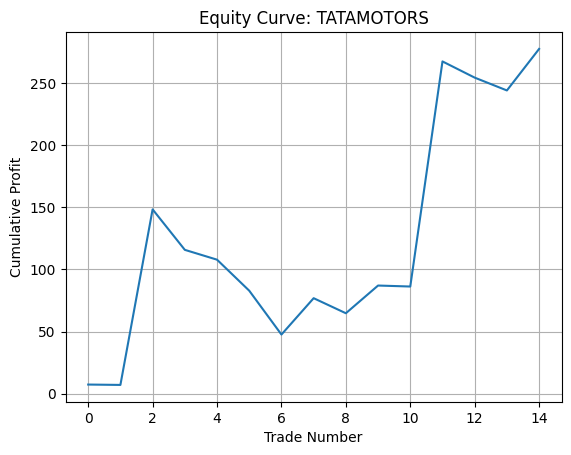

In [10]:
#CELL 5: Plot Equity Curve
results['Cumulative PnL'] = results['PnL'].cumsum()
results['Cumulative PnL'].plot(title=f"Equity Curve: {symbol}")
plt.xlabel("Trade Number")
plt.ylabel("Cumulative Profit")
plt.grid(True)
plt.show()


In [11]:
#CELL 6: Export CSV Report
results.to_csv(f"{symbol}_backtest_results.csv", index=False)
print(f"Saved results to {symbol}_backtest_results.csv")


Saved results to TATAMOTORS_backtest_results.csv


In [12]:
#CELL 7: Show Basic Performance Metrics
win_trades = results[results['PnL'] > 0]
loss_trades = results[results['PnL'] <= 0]

win_rate = len(win_trades) / len(results) * 100 if len(results) > 0 else 0
avg_win = win_trades['PnL'].mean() if not win_trades.empty else 0
avg_loss = loss_trades['PnL'].mean() if not loss_trades.empty else 0
reward_risk = abs(avg_win / avg_loss) if avg_loss != 0 else np.nan

print("\nPerformance Summary:")
print(f"Total Trades: {len(results)}")
print(f"Win Rate: {win_rate:.2f}%")
print(f"Avg Win: ₹{avg_win:.2f}, Avg Loss: ₹{avg_loss:.2f}")
print(f"Reward to Risk Ratio: {reward_risk:.2f}")



Performance Summary:
Total Trades: 15
Win Rate: 40.00%
Avg Win: ₹69.11, Avg Loss: ₹-15.25
Reward to Risk Ratio: 4.53


In [13]:
#CELL 8: Calculate Drawdown
results['Equity'] = results['Cumulative PnL']
results['Roll_Max'] = results['Equity'].cummax()
results['Drawdown'] = results['Roll_Max'] - results['Equity']
results['Drawdown %'] = results['Drawdown'] / results['Roll_Max'] * 100

max_drawdown = results['Drawdown %'].max()
print(f"Max Drawdown: {max_drawdown:.2f}%")


Max Drawdown: 67.91%


In [15]:
#CELL 9: Generate HTML Strategy Report
from IPython.core.display import HTML

report_html = f"""
<h2>Strategy Report: {symbol}</h2>
<ul>
  <li><b>Total Trades:</b> {len(results)}</li>
  <li><b>Win Rate:</b> {win_rate:.2f}%</li>
  <li><b>Avg Win:</b> ₹{avg_win:.2f}</li>
  <li><b>Avg Loss:</b> ₹{avg_loss:.2f}</li>
  <li><b>Reward to Risk Ratio:</b> {reward_risk:.2f}</li>
  <li><b>Max Drawdown:</b> {max_drawdown:.2f}%</li>
</ul>
"""

with open(f"{symbol}_strategy_report.html", "w", encoding="utf-8") as f:
    f.write(report_html)


HTML(report_html)
